# CNN and Computer Vision

## Part 1 - Neural Network

### Importing data

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2
import PIL

from sklearn.decomposition import PCA, IncrementalPCA

import keras
from keras.layers import Dense,Dropout, BatchNormalization, Activation, Flatten, Input
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical

from keras.preprocessing import image

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
train_folder='drive/My Drive/Projects/Computer Vision/train'

In [ ]:
data_dir_train = pathlib.Path(train_folder)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.png')) #list of all images (full path)
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nNumber of images: ', len(images_train))

Folder Structure:
drive/My Drive/Projects/Computer Vision/train/Maize
drive/My Drive/Projects/Computer Vision/train/Scentless Mayweed
drive/My Drive/Projects/Computer Vision/train/Small-flowered Cranesbill
drive/My Drive/Projects/Computer Vision/train/Common wheat
drive/My Drive/Projects/Computer Vision/train/Cleavers
drive/My Drive/Projects/Computer Vision/train/Common Chickweed
drive/My Drive/Projects/Computer Vision/train/Shepherds Purse
drive/My Drive/Projects/Computer Vision/train/Sugar beet
drive/My Drive/Projects/Computer Vision/train/Loose Silky-bent
drive/My Drive/Projects/Computer Vision/train/Fat Hen
drive/My Drive/Projects/Computer Vision/train/Charlock
drive/My Drive/Projects/Computer Vision/train/Black-grass
drive/My Drive/Projects/Computer Vision/train/Predict.png

Number of images:  4781


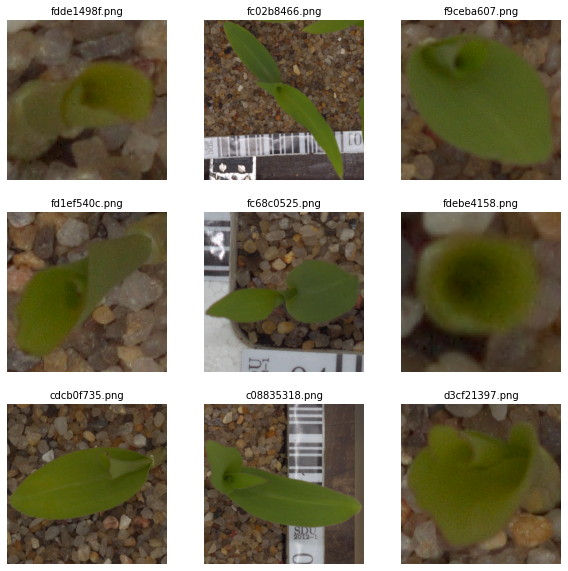

In [ ]:
# Displaying imported images
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(str(images_train[i]).split('/')[-1], fontsize=10) #get the file name and display as title
    plt.imshow(PIL.Image.open(images_train[i]))
    ax = plt.axis("off")

### Model Building

In [ ]:
image_size = 256
batch_size = 32

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
train_data = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/train',
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=1
                                                )

Found 3828 images belonging to 12 classes.


In [ ]:
val_data = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/train',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 953 images belonging to 12 classes.


In [ ]:
classes = train_data.class_indices
print(classes)
class_names = []
for c in classes:
    class_names.append(c)
print('The name of the classes are: ', class_names)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
The name of the classes are:  ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


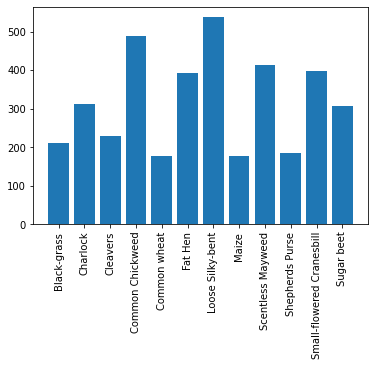

In [ ]:
unique, counts = np.unique(train_data.classes, return_counts=True)
dict1 = dict(zip(train_data.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

We can observe that there are more images in Loose Silky-bent and Common Chickweed folders compared to others.

In [ ]:
model_ann = Sequential()

inputs = Input(shape=(256,256,3))
model_ann.add(tf.keras.layers.Flatten())

model_ann.add(Dense(512,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())

model_ann.add(Dense(256,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())

model_ann.add(Dense(128,activation = "relu"))
model_ann.add(Dropout(0.2))

# Normalization layer
model_ann.add(tf.keras.layers.BatchNormalization())
model_ann.add(Dense(32,activation = "relu"))
model_ann.add(Dropout(0.2))


model_ann.add(Dense(12,activation='softmax'))

Here we use sequential model along with hidden layers having Batch normalization function and ReLU as activation function.

In [ ]:
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               100663808 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 256)               1

In [ ]:
history = model_ann.fit(train_data,
          epochs=20,                         
          steps_per_epoch= 3828//batch_size,  # Number of train images // batch_size
          validation_data=val_data,
          validation_steps = 953//batch_size # Number of val images // batch_size
)

Epoch 1/20
119/119 [==============================] - 154s 1s/step - loss: 2.8520 - accuracy: 0.0964 - val_loss: 2.4878 - val_accuracy: 0.1358
Epoch 2/20
119/119 [==============================] - 136s 1s/step - loss: 2.5525 - accuracy: 0.1202 - val_loss: 2.4405 - val_accuracy: 0.2047
Epoch 3/20
119/119 [==============================] - 129s 1s/step - loss: 2.4874 - accuracy: 0.1396 - val_loss: 2.3483 - val_accuracy: 0.1659
Epoch 4/20
119/119 [==============================] - 128s 1s/step - loss: 2.4141 - accuracy: 0.1472 - val_loss: 2.6181 - val_accuracy: 0.1045
Epoch 5/20
119/119 [==============================] - 128s 1s/step - loss: 2.3289 - accuracy: 0.1853 - val_loss: 2.7811 - val_accuracy: 0.1045
Epoch 6/20
119/119 [==============================] - 137s 1s/step - loss: 2.2856 - accuracy: 0.1940 - val_loss: 3.0810 - val_accuracy: 0.1056
Epoch 7/20
119/119 [==============================] - 128s 1s/step - loss: 2.2776 - accuracy: 0.2167 - val_loss: 2.4749 - val_accuracy: 0.1272

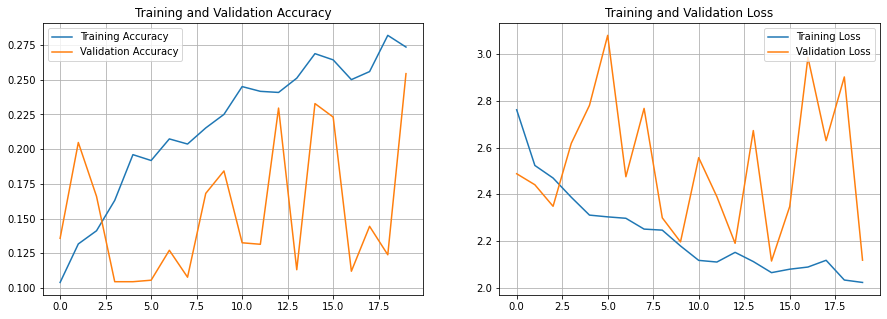

In [ ]:
epochs = 20

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

We can observe that validation accuracy and validation loss are not consistent like training accuracy and training loss.